# Sourcing and Analyzing Time Series Data
### Content
#### 1. Import Libraries and Data
#### 2.Data Wrangling
#### 3.Decomposing Time-Series Data
#### 4.Stationarity Test
#### 5.Stationarizing Data

## 1. Import Libraries and Data

In [1]:
conda install quandl

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using last library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore") 

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

In [3]:
# define path
path=r' C:\Users\cmas9\OneDrive\Documents\Master folder\House Sales in King County'

In [4]:
# Import the dataset
df = pd.read_csv(r'C:\Users\cmas9\OneDrive\Documents\Master folder\House Sales in King County\Data\Adjusted Data\kc_house_data.csv', index_col = False) 

## 2. Data Wrangling

In [5]:
df['date_of_sale']=pd.to_datetime(df['date_of_sale'])

In [6]:
df['Month_Year']=df['date_of_sale'].dt.to_period('M').dt.strftime('%Y-%m')

In [7]:
# Checking shape

df.shape

(21613, 27)

In [8]:
# Checking headers

pd.options.display.max_columns = None
df.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date_of_sale,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price category,lat_long,Month_Year
0,0,0,0,0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,Middle price,"(47.5112, -122.257)",2014-10
1,1,1,1,1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,High price,"(47.721, -122.319)",2014-12
2,2,2,2,2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,Low price,"(47.7379, -122.233)",2015-02
3,3,3,3,3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,High price,"(47.5208, -122.393)",2014-12
4,4,4,4,4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,High price,"(47.6168, -122.045)",2015-02


In [9]:
#drop columns
df.drop(['Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'],axis=1, inplace=True)

In [10]:
df.head()

,id,date_of_sale,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price category,lat_long,Month_Year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,Middle price,"(47.5112, -122.257)",2014-10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,High price,"(47.721, -122.319)",2014-12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,Low price,"(47.7379, -122.233)",2015-02
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,High price,"(47.5208, -122.393)",2014-12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,High price,"(47.6168, -122.045)",2015-02


##### The data set only spans 2 years (2014-2017) and the sample size may not be large enough if analyzed on a yearly basis. As a result, this will be looked into on a monthly basis.

In [11]:
# Creating a new dataframe with median housing prices grouped by dates

data = df.groupby('Month_Year').agg({'price': 'median'})

In [12]:
data.head()

,price
Month_Year,
2014-05,465000.0
2014-06,465000.0
2014-07,465000.0
2014-08,442100.0
2014-09,450000.0


In [13]:
data

,price
Month_Year,
2014-05,465000.0
2014-06,465000.0
2014-07,465000.0
2014-08,442100.0
2014-09,450000.0
2014-10,446900.0
2014-11,435000.0
2014-12,432500.0
2015-01,438500.0


In [14]:
# Checking data types

data.dtypes

price    float64
dtype: object

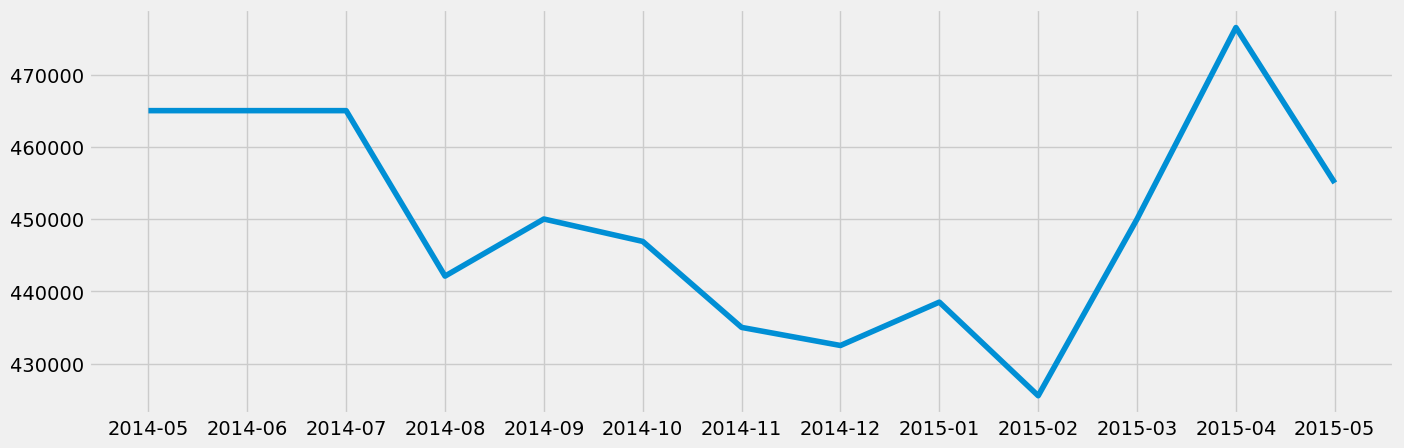

In [15]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [16]:
# Check for missing values 

data.isnull().sum() 

price    0
dtype: int64

## 3.Decomposing Time-Series Data

In [17]:
a=data.asfreq(pd.infer_freq(data)).fillna(10)

In [18]:
pd.infer_freq(data)

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive',period=1)

In [20]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

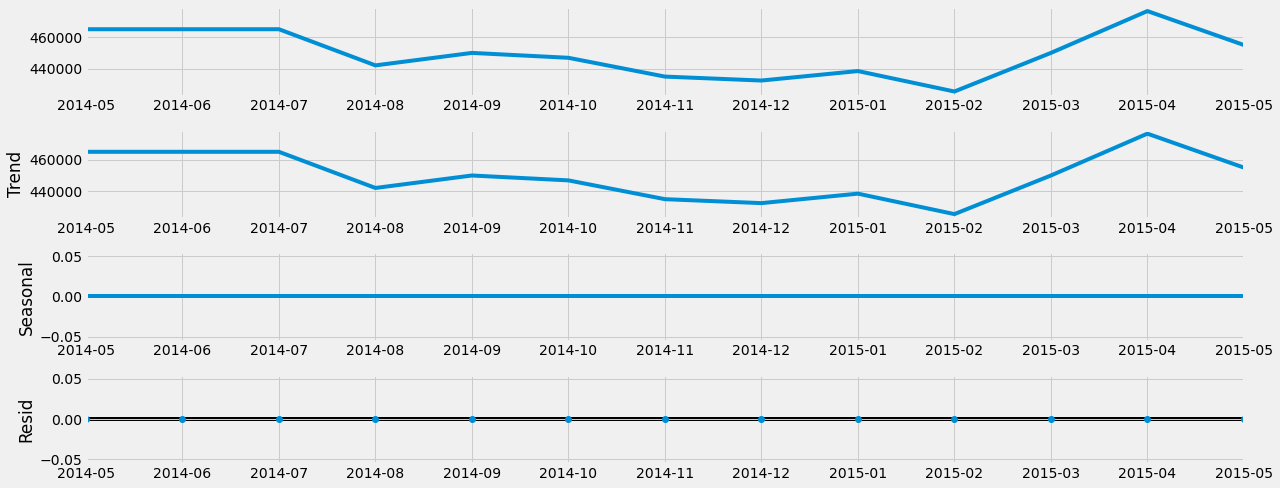

In [21]:
decomposition.plot()
plt.show()

##### The trend show a decrease starting in Jul 2014 with small increases and decrease until an increase in Feb 2015 to Apr 2015, with a decrease starting in Apr 2015. There is no seasonality in the sales of houses in Seattle. 

# 4.Stationarity Test

In [22]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.052467
p-value                         0.264052
Number of Lags Used             1.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


##### H0 = Presence of a unit root (non-stationary)
##### HA = Unit root present (stationary)
##### The test statistic -2.052467 is larger than the critical value (5%) of -3.189369, meaning the null hypothesis cannot be rejected. The result is also not significant as the p-value is more than 0.05.

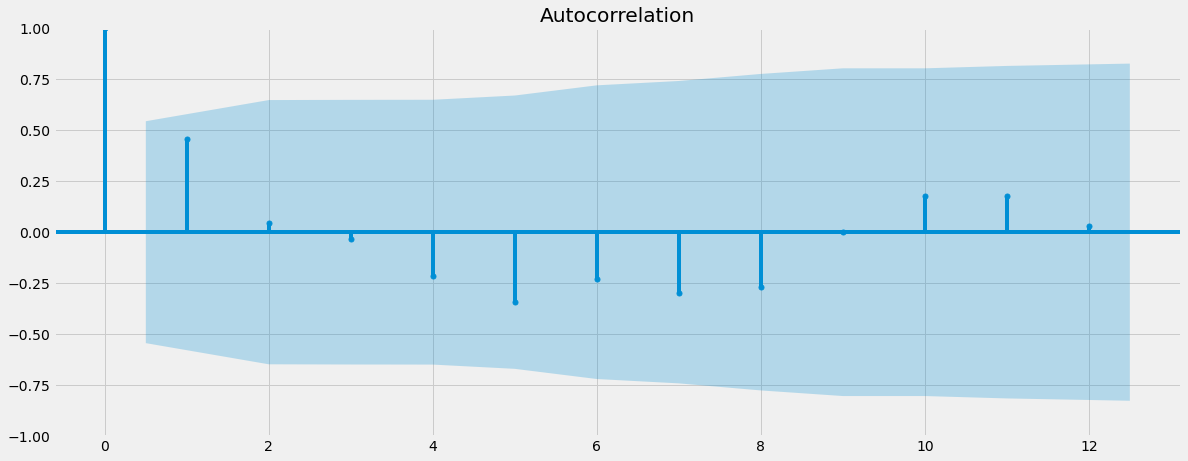

In [23]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

#####  The vertical lines represent the lags in the series, while the blue area represents the confidence interval. The stationary is strong due to no vertical lines going above the confidence interval.

# 6. Stationarizing Data

In [24]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = data - data.shift(1)

In [25]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [26]:
# Checking values and headers

data_diff.head()

,price
Month_Year,
2014-06,0.0
2014-07,0.0
2014-08,-22900.0
2014-09,7900.0
2014-10,-3100.0


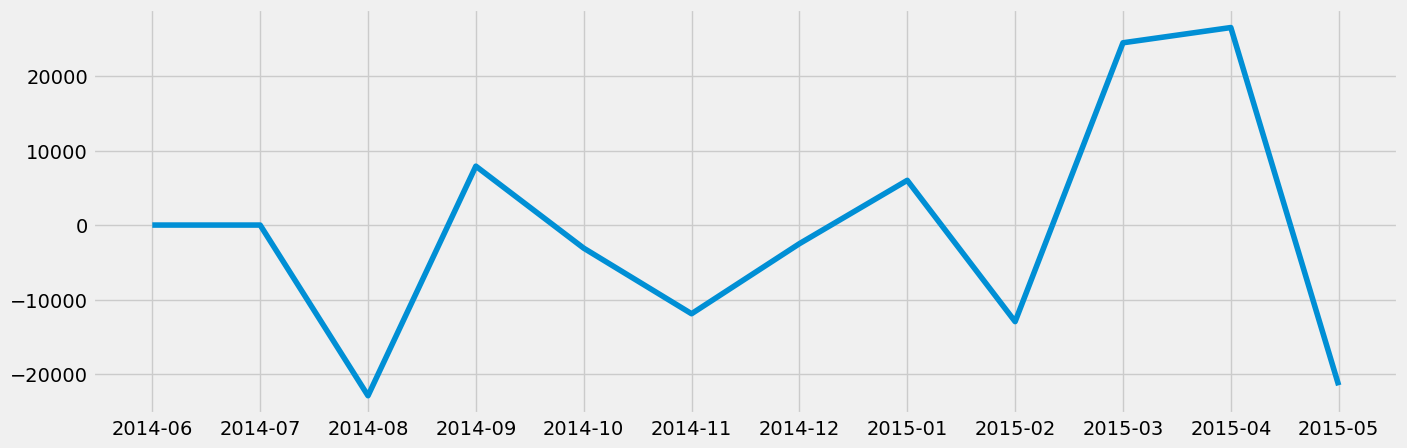

In [27]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.935380
p-value                         0.041386
Number of Lags Used             1.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


#####  The results show that the data is still stationary. The test statistic value (-2.935380) is bigger than the critical value (5%) of -3.232950 and the p-value is smaller than 0.05. Therefore, the test result is non-significant and the null hypothesis can't be rejected.

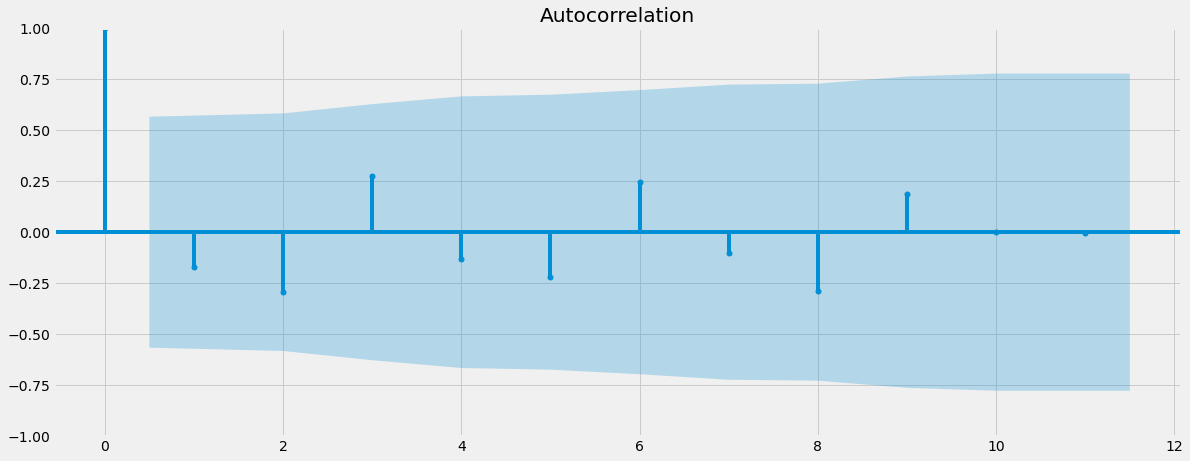

In [29]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

##### The autocorrelation is only slightly different. The stationary is strong due to no vertical lines going above the confidence interval.

In [30]:
df.to_csv(r'C:\Users\cmas9\OneDrive\Documents\Master folder\House Sales in King County\Data\Adjusted Data\kc_house_data.csv')